## p152. 모집단 분포와 정규분포

$\bar{x} = \frac{x_1 +x_2 + \cdots + x_n}{n}$에 대하여 $n$이 커질 때 $\bar{x}$의 변화를 그래프로 살펴보기

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
x = np.arange(start=1, stop=7.1, step=0.1)

In [3]:
x

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ])

In [4]:
y=stats.norm.pdf(x=x, loc=4, scale=0.8)
y

array([4.40744603e-04, 6.98826903e-04, 1.09085337e-03, 1.67639859e-03,
       2.53631007e-03, 3.77782254e-03, 5.53981051e-03, 7.99765039e-03,
       1.13669531e-02, 1.59052270e-02, 2.19103756e-02, 2.97148760e-02,
       3.96745648e-02, 5.21512316e-02, 6.74887081e-02, 8.59828448e-02,
       1.07846649e-01, 1.33172835e-01, 1.61896995e-01, 1.93765332e-01,
       2.28311357e-01, 2.64845807e-01, 3.02463406e-01, 3.40068748e-01,
       3.76421790e-01, 4.10201211e-01, 4.40081658e-01, 4.64818867e-01,
       4.83335146e-01, 4.94797109e-01, 4.98677851e-01, 4.94797109e-01,
       4.83335146e-01, 4.64818867e-01, 4.40081658e-01, 4.10201211e-01,
       3.76421790e-01, 3.40068748e-01, 3.02463406e-01, 2.64845807e-01,
       2.28311357e-01, 1.93765332e-01, 1.61896995e-01, 1.33172835e-01,
       1.07846649e-01, 8.59828448e-02, 6.74887081e-02, 5.21512316e-02,
       3.96745648e-02, 2.97148760e-02, 2.19103756e-02, 1.59052270e-02,
       1.13669531e-02, 7.99765039e-03, 5.53981051e-03, 3.77782254e-03,
      

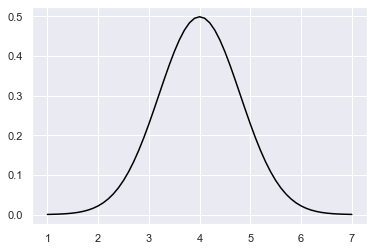

In [5]:
plt.plot(x,y,color='black')

### 랜덤한 자료를 얻는 법

In [6]:
sampling_norm = stats.norm.rvs(loc=4 , scale=0.8, size=10)
sampling_norm

array([3.18973777, 3.45771484, 3.75755954, 5.41663982, 4.67301393,
       3.47148368, 5.47007078, 5.25379723, 3.91295074, 3.12044606])

In [7]:
np.mean(sampling_norm)

4.172341439989413

In [8]:
np.std(sampling_norm)

0.892514071552844

### 표본평균의 분포 확인하기

In [9]:
population = stats.norm(loc=4, scale=0.8)
population.rvs(size=10) # 평균이 4이고 표준편차가 0.8인 램덤자료 생성

array([2.84730855, 4.60312935, 4.03353763, 4.31583281, 3.47267818,
       3.5815841 , 3.34167506, 5.24550272, 4.40418388, 4.40845245])

In [10]:
sample_mean_array = np.zeros(100)
for i in range(100):
    sample = population.rvs(size=10)
    sample_mean_array[i]=np.mean(sample)
    
    

In [11]:
np.mean(sample_mean_array)

3.9828849662986285

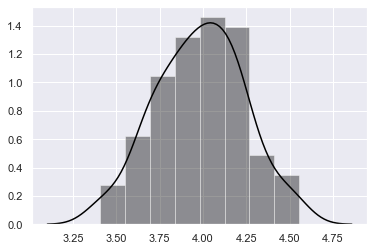

In [12]:
sns.distplot(sample_mean_array, color='black')

In [13]:
def myt(mymean,mystu):
    """평균과 표준편차 입력하는 클로저 함수"""
    def myt2(mysize,mycount=1000,mycolor="black"):
        sample_mean_array = np.zeros(mycount)
        for i in range(mycount):
            sample = stats.norm(loc=mymean, scale=mystu).rvs(size=mysize)
            sample_mean_array[i]=np.mean(sample)
            
        return sns.distplot(sample_mean_array, color=mycolor)
    return myt2


In [14]:
myfigure=myt(4,0.8)

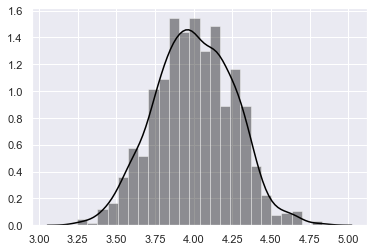

In [15]:
myfigure(10)

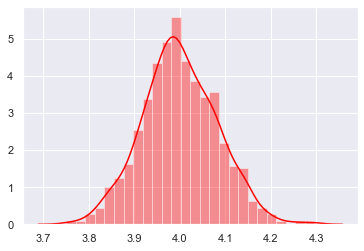

In [16]:
myfigure(100,mycolor='red')

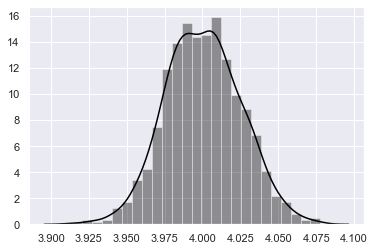

In [17]:
myfigure(1000)

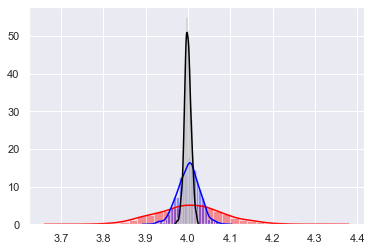

In [18]:
for i,c in [(100,'red'),(1000,'blue'),(10000,'black')]:
    myfigure(i,mycolor=c)


## 결론
- n이 클수록 표준편차가 작아진다.

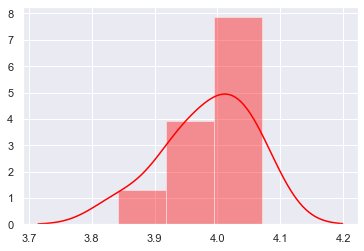

In [19]:
myfigure(100,mycount=10,mycolor='red')